# Questions

## Increase in surface salinity in the arctic, is there some kind of trend in obersved data? What about models?

## How well does models represent the changes in salinity, and can they be used as a good indication for the future?

## How does sea surface salinity affect the vertical ocean circulation? And is this influence impactfull?

## What can we say about the sea surface salinity in the future, and how will this affect the vertical circulation in the arctic?


The Arctic has a greater temperature increase than other parts of the world because of arctic amplification [reference]. 

In [34]:
import functions as f
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import s3fs
import cftime
import intake
import numpy as np
from joblib import Parallel, delayed
from pyproj import Transformer
from datetime import datetime
from scipy import stats
import s3fs
from dask.diagnostics import ProgressBar
import datetime
from dateutil.relativedelta import relativedelta
from matplotlib.widgets import Slider, Button 
from ipywidgets import interact
%load_ext autoreload
%autoreload 2
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", client_kwargs=dict(endpoint_url="https://rgw.met.no"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Satellite data regions

## Region 1

In [35]:
import time
path='escience2022/Antoine/ESA_SMOS_Arctic_Sea_Surface_Salinity/'
years = [2011,2012,2013,2014,2015,2016,2017,2018,2019]
start = time.time()
sat_data = f.collect_satellite_data(years, path)
print(time.time()-start)

240.54908061027527


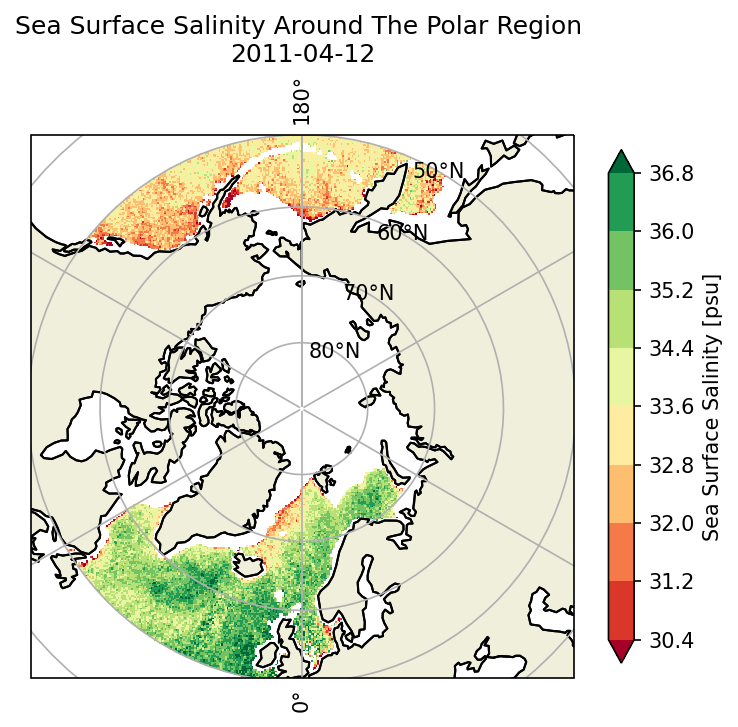

In [4]:
f.plot_sss_sat(sat_data['sss'][100], title=f'Sea Surface Salinity Around The Polar Region')

In [37]:
SatRegion1 = f.slice_data(sat_data, '2009-01-01', '2022-02-01', -10, 10, 70, 85)
SatRegion2 = f.slice_data(sat_data, '2009-01-01', '2022-02-01', 100, 160, 70, 80)

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interactive
%matplotlib inline

columns=['a','b','c']
data = np.cumsum(np.random.rand(10,3),axis=1)
df = pd.DataFrame(data,columns=columns)

def g(x,y):
    plt.scatter(df[x], df[y])
    plt.show()

interactive_plot = interactive(g, x=columns, y=columns)
interactive_plot

interactive(children=(Dropdown(description='x', options=('a', 'b', 'c'), value='a'), Dropdown(description='y',…

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interactive
%matplotlib inline

times = np.arange(365)

def g(time=100):
    fig, axs = plt.subplots(1,2,figsize=(10,5), dpi=150, subplot_kw={'projection':ccrs.NorthPolarStereo()})
    
    SatRegion1['sss'][time].plot.pcolormesh(
        ax=axs[0],
        cbar_kwargs={
            'orientation':'vertical',
            'shrink':.8,
            'label': 'Sea Surface Salinity [psu]'
            },
        transform=ccrs.epsg(6931),
        robust=True,
        cmap='RdYlGn')
    
    SatRegion2['sss'][time].plot.pcolormesh(
        ax=axs[1],
        cbar_kwargs={
            'orientation':'vertical',
            'shrink':.8,
            'label': 'Sea Surface Salinity [psu]'
            },
        transform=ccrs.epsg(6931),
        robust=True,
        cmap='RdYlGn')
    
    axs[0].set_extent([-20,20,67,85], ccrs.PlateCarree())
    axs[1].set_extent([82,180,70,85], ccrs.PlateCarree())
    axs[0].gridlines(draw_labels=True)
    axs[1].gridlines(draw_labels=True)
    axs[0].coastlines()
    axs[0].add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
    axs[1].coastlines()
    axs[1].add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
    axs[0].add_feature(cartopy.feature.RIVERS, zorder=1, edgecolor='blue')
    axs[1].add_feature(cartopy.feature.RIVERS, zorder=1, edgecolor='blue')
    time1 = f'{str(SatRegion1.sss[time].time.values)[0:10]}'
    time2 = f'{str(SatRegion2.sss[time].time.values)[0:10]}'
    axs[0].set_title(f'Sea Surface Salinity Greenland Sea \n{time1}')
    axs[1].set_title(f'Sea Surface Salinity Siberian Sea \n{time2}')

    plt.show()

interactive_plot = interactive(g, time=times)
interactive_plot

interactive(children=(Dropdown(description='time', index=100, options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1…

TypeError: cannot unpack non-iterable GeoQuadMesh object

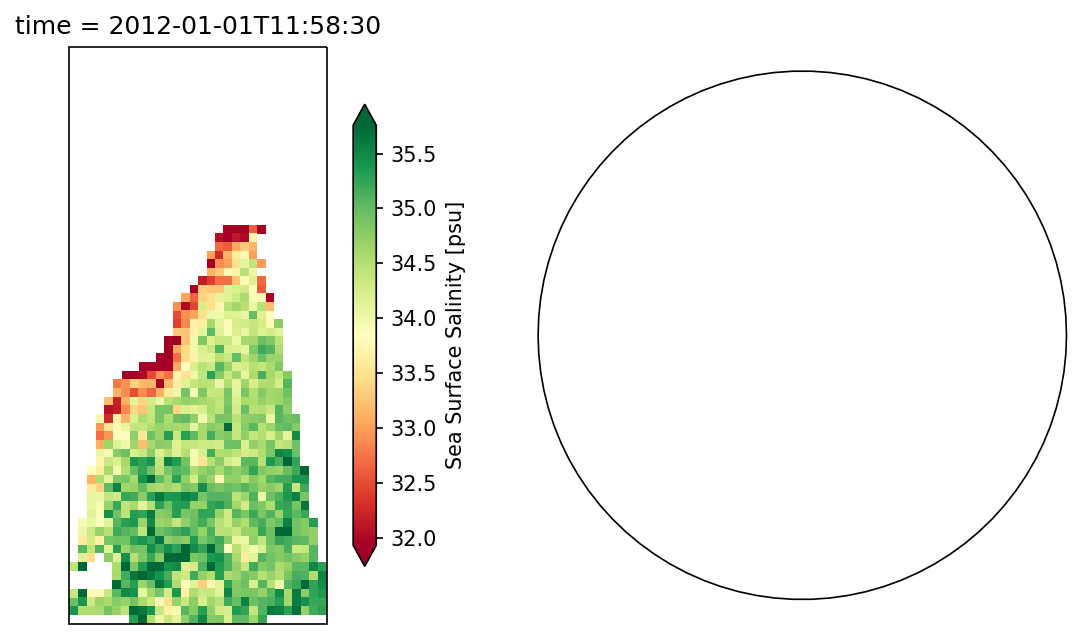

In [231]:
def timestampr1(time):
    return SatRegion1['sss'][time]

def timestampr2(time):
    return SatRegion2['sss'][time]

init=364

fig, axs = plt.subplots(1,2,figsize=(10,5), dpi=150, subplot_kw={'projection':ccrs.NorthPolarStereo()})

r1, = timestampr1(init).plot.pcolormesh(
        ax=axs[0],
        cbar_kwargs={
            'orientation':'vertical',
            'shrink':.8,
            'label': 'Sea Surface Salinity [psu]'
            },
        transform=ccrs.epsg(6931),
        robust=True,
        cmap='RdYlGn')

r2, = timestampr2(init).plot.pcolormesh(
        ax=axs[1],
        cbar_kwargs={
            'orientation':'vertical',
            'shrink':.8,
            'label': 'Sea Surface Salinity [psu]'
            },
        transform=ccrs.epsg(6931),
        robust=True,
        cmap='RdYlGn')

#fig.subplots_adjust(left=0.25, bottom=0.25)
axr1=fig.add_axes([0.25, 0.1, 0.65, 0.03])

tslider = Slider(
    ax=axr1,
    label="Time",
    valmin=365,
    valmax=730,
    valinit=init,
)

def update(val):
    r2.set_ydata(timestampr(tslider.val))
    axs.canvas.draw_idle()

tslider.on_changed(update)

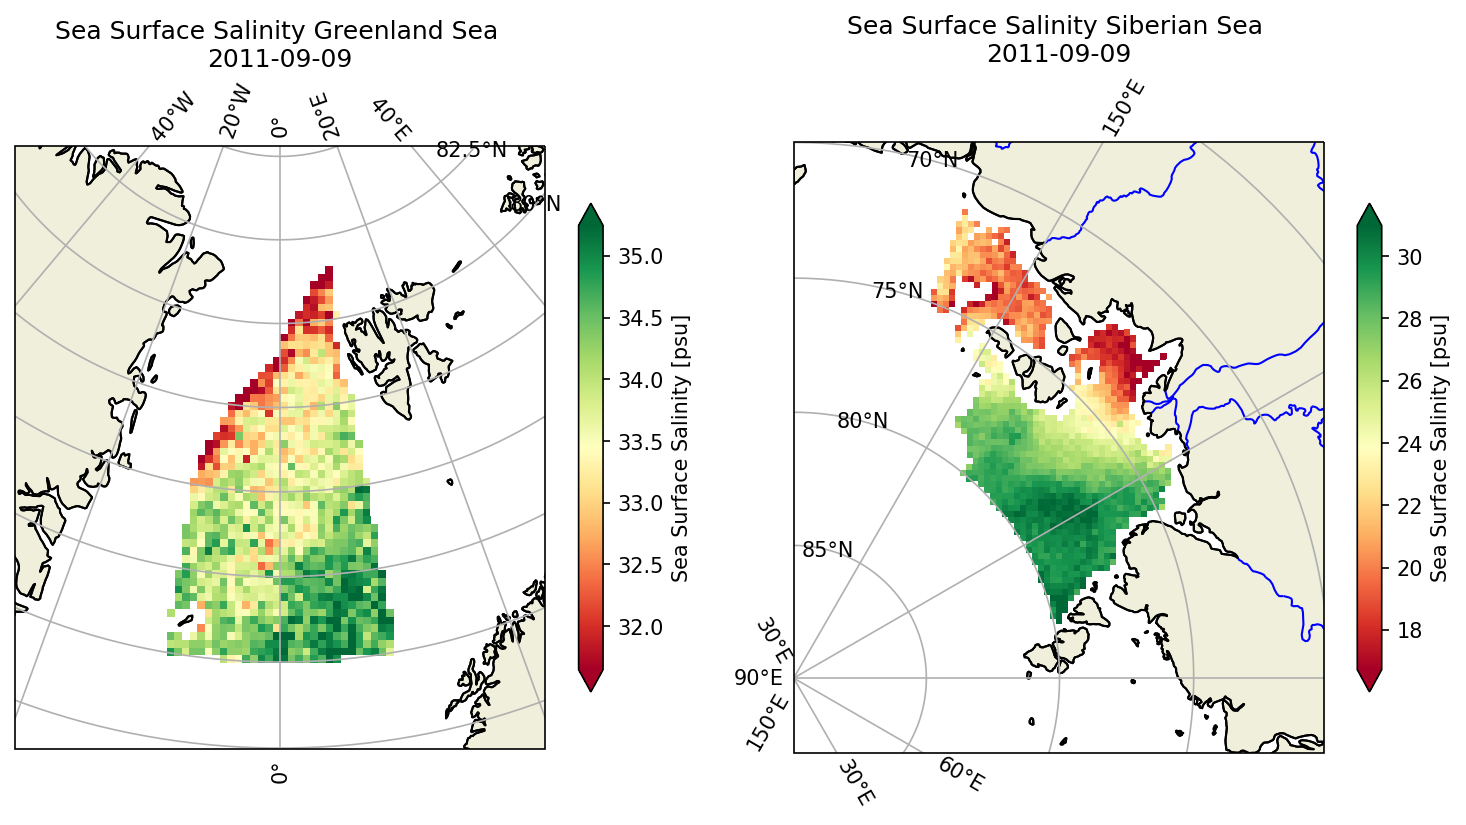

In [36]:
fig, axs = plt.subplots(1,2, figsize=(10,5), dpi=150, subplot_kw={'projection':ccrs.NorthPolarStereo()})

SatRegion1['sss'][250].plot.pcolormesh(
        ax=axs[0],
        cbar_kwargs={
            'orientation':'vertical',
            'shrink':.8,
            'label': 'Sea Surface Salinity [psu]'
            },
        transform=ccrs.epsg(6931),
        robust=True,
        cmap='RdYlGn')

SatRegion2['sss'][250].plot.pcolormesh(
        ax=axs[1],
        cbar_kwargs={
            'orientation':'vertical',
            'shrink':.8,
            'label': 'Sea Surface Salinity [psu]'
            },
        transform=ccrs.epsg(6931),
        robust=True,
        cmap='RdYlGn')

axs[0].set_extent([-20,20,67,85], ccrs.PlateCarree())
axs[1].set_extent([82,180,70,85], ccrs.PlateCarree())
axs[0].gridlines(draw_labels=True)
axs[1].gridlines(draw_labels=True)
axs[0].coastlines()
axs[0].add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
axs[1].coastlines()
axs[1].add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
axs[0].add_feature(cartopy.feature.RIVERS, zorder=1, edgecolor='blue')
axs[1].add_feature(cartopy.feature.RIVERS, zorder=1, edgecolor='blue')
time1 = f'{str(SatRegion1.sss[250].time.values)[0:10]}'
time2 = f'{str(SatRegion2.sss[250].time.values)[0:10]}'
axs[0].set_title(f'Sea Surface Salinity Greenland Sea \n{time1}')
axs[1].set_title(f'Sea Surface Salinity Siberian Sea \n{time2}')
plt.tight_layout()
plt.show()

# Seasonality

## Region 1

In [148]:
month = SatRegion1['time.month']
year = SatRegion1['time.year']
mean_list = []
years = [2011,2012,2013,2014,2015,2016,2017,2018,2019]
for y in years: #This piece of the code is definitely not my biggest pride....
    for m in [1,2,3,4,5,6,7,8,9,10,11,12]:
        tmp = SatRegion1.where((month.isin(m)) & (year.isin(y))).mean('time')
        mean_list.append(tmp['sss'].mean())
TimeSeriesStd = SatRegion1['sss'].std(dim=['x', 'y']).compute()
TimeSeriesMean = SatRegion1['sss'].mean(dim=['x', 'y']).compute()

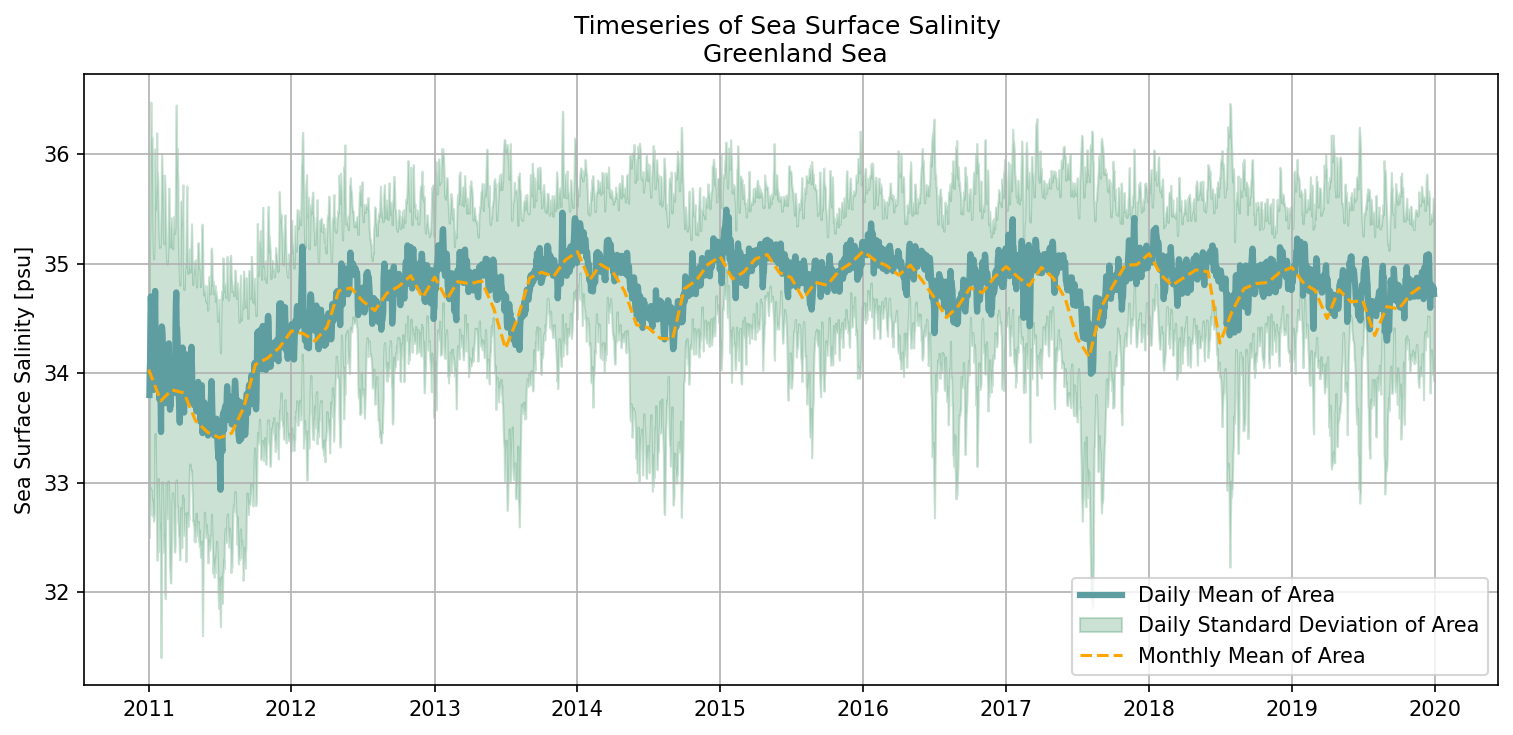

In [171]:
dates = np.array([datetime.datetime(y,1,1) + relativedelta(months=m)for y in years for m in range(12)])
fig, ax = plt.subplots(figsize=(10,5), dpi=150)
plt.plot(TimeSeriesMean.time, TimeSeriesMean, color='cadetblue', lw = 3, label='Daily Mean of Area')
ax.fill_between(TimeSeriesMean.time, TimeSeriesMean-TimeSeriesStd, TimeSeriesMean+TimeSeriesStd, color='seagreen', alpha=0.25, label='Daily Standard Deviation of Area')
plt.plot(dates, mean_list, '--', color='orange', label='Monthly Mean of Area')
plt.grid()
plt.title('Timeseries of Sea Surface Salinity \n Greenland Sea')
plt.tight_layout()
plt.ylabel('Sea Surface Salinity [psu]')
plt.legend(loc='lower right')
plt.show()

In [173]:
MeanSat = SatRegion1['sss'].groupby('time.dayofyear').mean(dim=['time', 'x', 'y']).compute()#.mean('x').mean('y').compute()
s = SatRegion1['sss'].mean(dim=['x','y']).compute().groupby('time.dayofyear')
StdSat = SatRegion1['sss'].groupby('time.dayofyear').std(dim=['time', 'x', 'y']).compute()

In [10]:
np.save('SeaSurfaceSalinitySatellitSeasonality.npy', MeanSat)

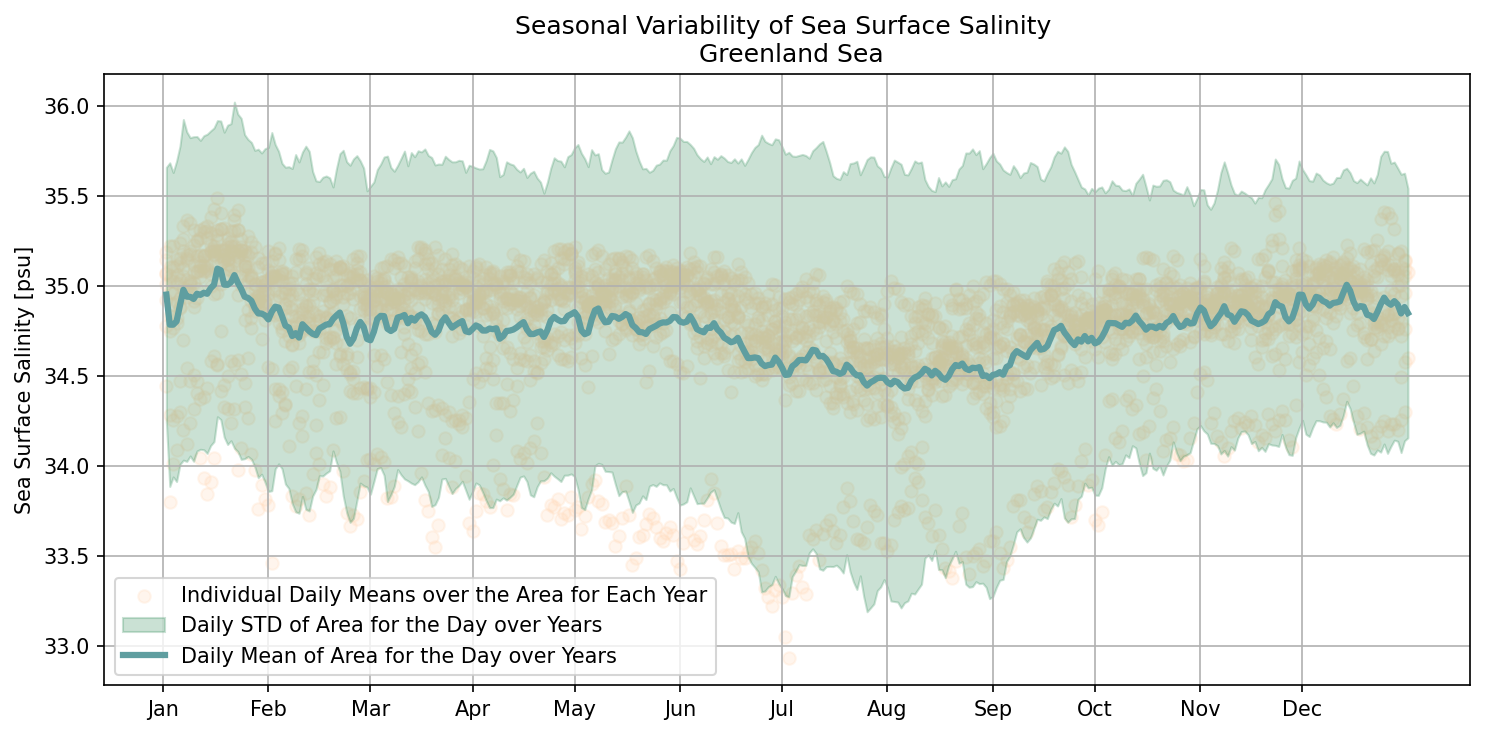

In [186]:
x = np.arange(1,367)

fig, ax = plt.subplots(figsize=(10,5), dpi=150)
for month in s.groups.keys():
    m = np.full(len(s[month]), month)
    sct = plt.scatter(m, s[month], color='peachpuff', alpha=0.25)
ax.fill_between(x, MeanSat-StdSat, MeanSat+StdSat, color='seagreen', alpha=0.25, label='Daily STD of Area for the Day over Years')
sct.set_label('Individual Daily Means over the Area for Each Year')

plt.plot(x, MeanSat, color='cadetblue', lw = 3, label='Daily Mean of Area for the Day over Years')

dic = { 0:'Jan', 31:'Feb', 61:'Mar', 91:'Apr', 121:'May', 152:'Jun', 182:'Jul', 213:'Aug', 244:'Sep', 274:'Oct', 305:'Nov', 335:'Dec'}
ticks = [0,31,61,91,121,152,182,213,244,274,305,335]
labels = [ticks[i] if t not in dic.keys() else dic[t] for i,t in enumerate(ticks)]
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
plt.grid()
plt.title('Seasonal Variability of Sea Surface Salinity \n Greenland Sea')
plt.ylabel('Sea Surface Salinity [psu]')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()
#We se a clear seasonal variation which follows the ice melt.
#Some variability during the season, mostly during the same time period as the ice melts. Different temperatures each year ----> different amount of fresh water flux from ice melt
#The std might not look good, but it is actually only 1-1.5. If we look at the bins below, we see that this spread can make sense

/srv/conda/envs/notebook/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


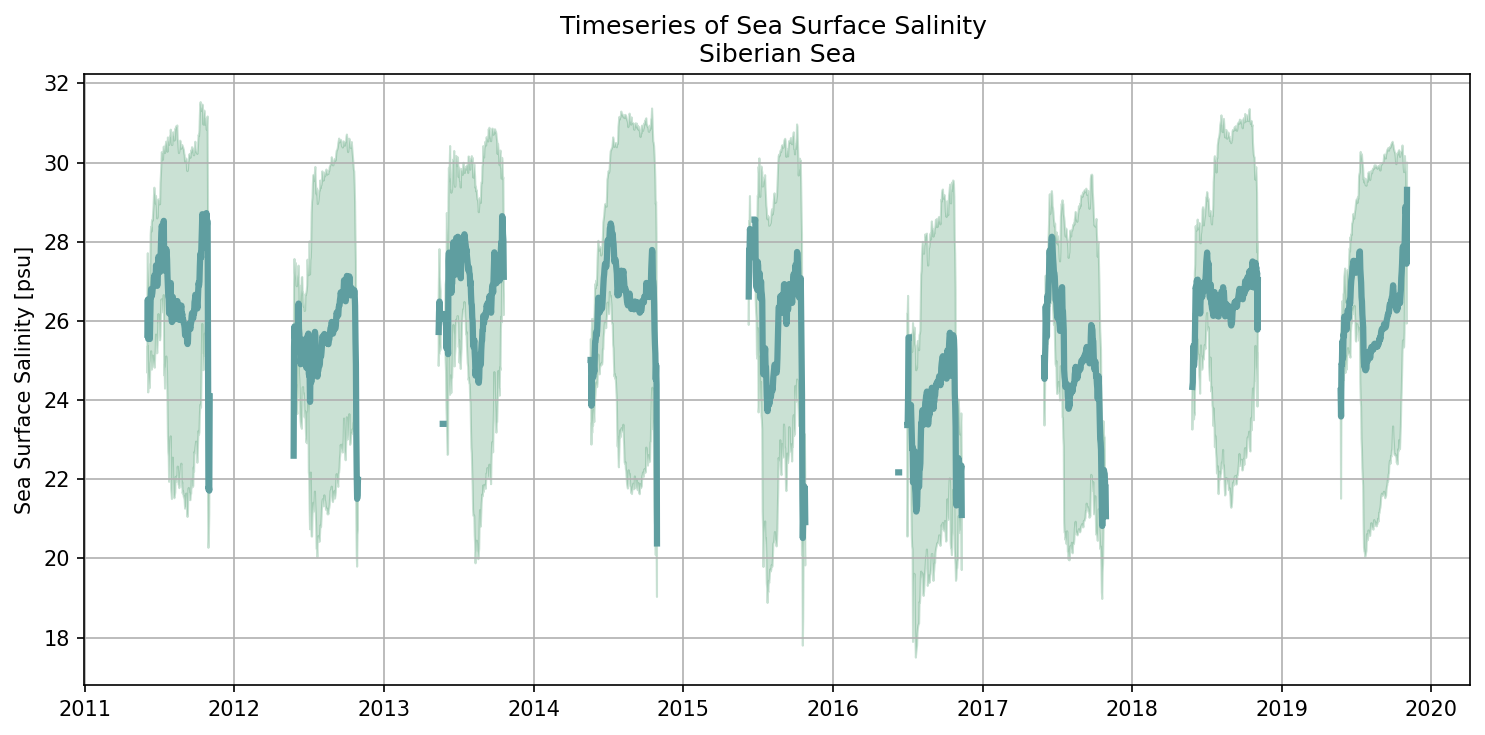

In [197]:
TimeSeriesStd2 = SatRegion2['sss'].std(dim=['x', 'y']).compute()
TimeSeriesMean2 = SatRegion2['sss'].mean(dim=['x', 'y']).compute()

ticks = [0,12,24,36,48,60,72,84,96]
dic = { 0:'2012', 12:'2013', 24:'2014', 36:'2015', 48:'2016', 60:'2017', 72:'2018', 84:'2019', 96:'2020'}
labels = [ticks[i] if t not in dic.keys() else dic[t] for i,t in enumerate(ticks)]

fig, ax = plt.subplots(figsize=(10,5), dpi=150)
plt.plot(TimeSeriesMean2.time, TimeSeriesMean2, color='cadetblue', lw = 3)
ax.fill_between(TimeSeriesMean2.time, TimeSeriesMean2-TimeSeriesStd2, TimeSeriesMean2+TimeSeriesStd2, color='seagreen', alpha=0.25)
plt.title('Timeseries of Sea Surface Salinity \nSiberian Sea')
plt.ylabel('Sea Surface Salinity [psu]')
plt.tight_layout()
plt.grid()

Text(0.5, 1.0, 'Sea Surface Salinity Distribution for Some Randomly Selected days \nGreenland Sea and Siberian Sea')

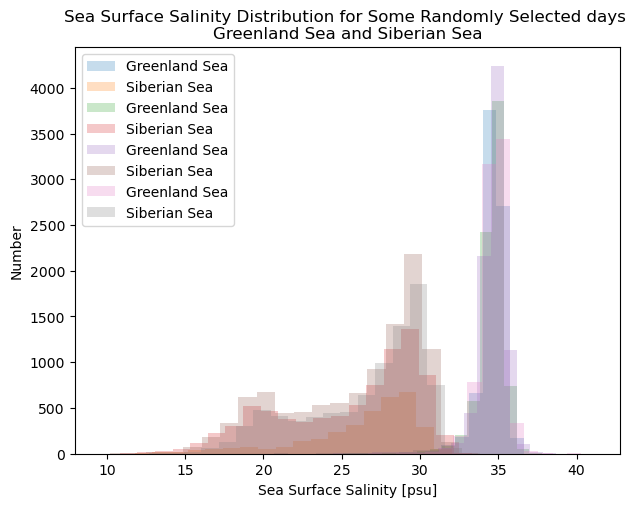

In [41]:
#plt.hist(SatRegion1['sss'].groupby('time.dayofyear')[100])
SatRegion1['sss'].groupby('time.dayofyear')[100].values.ravel()
runthrough = np.arange(200,300,25)
for i in runthrough:
    plt.hist(SatRegion1['sss'].groupby('time.dayofyear')[i].values.ravel(), bins=20, alpha = 0.25, label='Greenland Sea')
    plt.hist(SatRegion2['sss'].groupby('time.dayofyear')[i].values.ravel(), bins=20, alpha = 0.25, label='Siberian Sea')
plt.xlabel('Sea Surface Salinity [psu]')
plt.ylabel('Number')
plt.legend(loc='upper left')
plt.tight_layout()
plt.title('Sea Surface Salinity Distribution for Some Randomly Selected days \nGreenland Sea and Siberian Sea')

In [28]:
import datetime
years = np.arange(2011,2020,1)
days = np.arange(0,365,1)
dates = np.array([
    [datetime.datetime(y, 1,1) + datetime.timedelta(d) for d in range(365)] for y in years])

salinity_matrix = np.array([[
    SatRegion1['sss'].sel(time=dates[i,j], method='nearest').mean(dim=['x', 'y'])
                            for i in range(np.shape(dates)[0])] 
                                           for j in range(np.shape(dates)[1])])

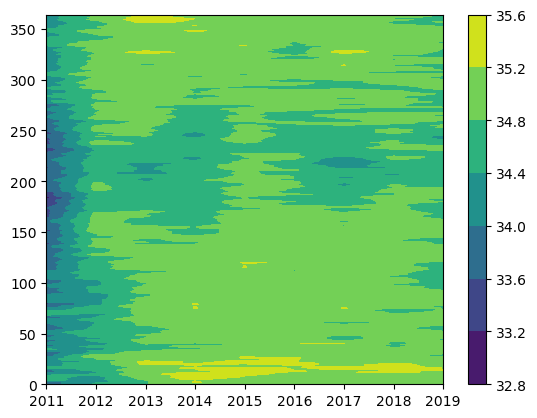

In [29]:
Y, D = np.meshgrid(years, days)
plt.contourf(Y, D, salinity_matrix)
plt.colorbar()

## Region 2

In [18]:
MeanSat2 = SatRegion2['sss'].groupby('time.dayofyear').mean(['time', 'x', 'y']).compute()
s2 = SatRegion2['sss'].mean(dim=['x', 'y']).compute().groupby('time.dayofyear')
StdSat2 = SatRegion2['sss'].groupby('time.dayofyear').std(dim=['time', 'x', 'y']).compute()

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


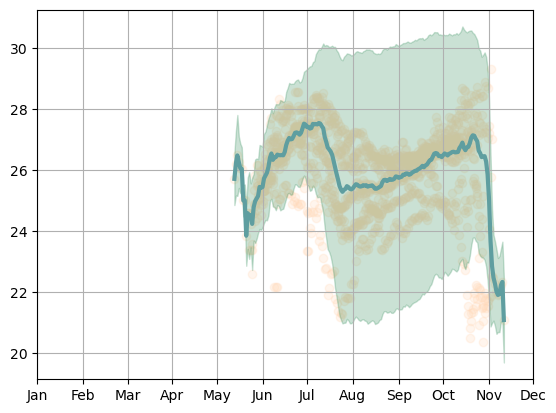

In [32]:
x = np.arange(1,367)

fig, ax = plt.subplots()
for month in s2.groups.keys():
    m = np.full(len(s2[month]), month)
    plt.scatter(m, s2[month], color='peachpuff', alpha=0.25)
ax.fill_between(x, MeanSat2-StdSat2, MeanSat2+StdSat2, color='seagreen', alpha=0.25)

plt.plot(x, MeanSat2, color='cadetblue', lw = 3)

dic = { 0:'Jan', 31:'Feb', 61:'Mar', 91:'Apr', 121:'May', 152:'Jun', 182:'Jul', 213:'Aug', 244:'Sep', 274:'Oct', 305:'Nov', 335:'Dec'}
ticks = [0,31,61,91,121,152,182,213,244,274,305,335]
labels = [ticks[i] if t not in dic.keys() else dic[t] for i,t in enumerate(ticks)]
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
plt.grid()
plt.show()


In [33]:
import datetime
years = np.arange(2011,2020,1)
days = np.arange(0,365,1)
dates = np.array([
    [datetime.datetime(y, 1,1) + datetime.timedelta(d) for d in range(365)] for y in years])

salinity_matrix2 = np.array([[
    SatRegion2['sss'].sel(time=dates[i,j], method='nearest').mean(dim=['x', 'y'])
                            for i in range(np.shape(dates)[0])] 
                                           for j in range(np.shape(dates)[1])])



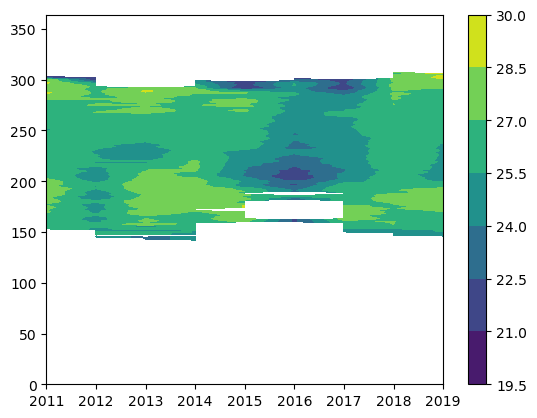

In [44]:
test = SatRegion2['sss'].mean(dim=['x', 'y']).values.reshape(365,9)
Y, D = np.meshgrid(years, days)
plt.contourf(Y, D, salinity_matrix2)
plt.colorbar()

## Correlation with ice concentration

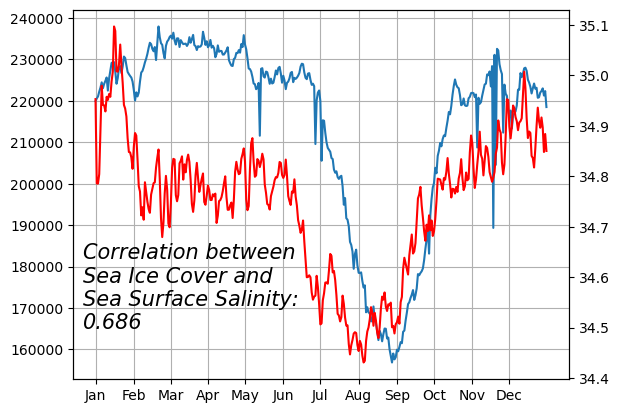

In [51]:
ice_path = 'AMSR2_E_Daily sea ice extent_GL sea.nc'
ice_ds = xr.open_dataset(ice_path)

MeanIceDaily = ice_ds['z'].groupby('time.dayofyear').mean('time').compute()
STDIceDaily = ice_ds['z'].groupby('time.dayofyear').std('time').compute()

x = np.arange(366)
fig, ax = plt.subplots()
ax1 = ax.twinx()
#ax.fill_between(x, MeanIceDaily+STDIceDaily, MeanIceDaily-STDIceDaily, color='seashell')
#ax1.fill_between(x, MeanSat-StdSat, MeanSat+StdSat, color='seashell')
ax.plot(x, MeanIceDaily)

ax1.plot(x, MeanSat, 'r')
dic = { 0:'Jan', 31:'Feb', 61:'Mar', 91:'Apr', 121:'May', 152:'Jun', 182:'Jul', 213:'Aug', 244:'Sep', 274:'Oct', 305:'Nov', 335:'Dec'}
ticks = [0,31,61,91,121,152,182,213,244,274,305,335]
labels = [ticks[i] if t not in dic.keys() else dic[t] for i,t in enumerate(ticks)]
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
corr = np.corrcoef(MeanIceDaily, MeanSat)[0,1]
ax.text(-10, 165000, f'Correlation between \nSea Ice Cover and \nSea Surface Salinity:\n{corr:.3f}', style ='italic',
        fontsize = 15, color ="black")
ax.grid()
plt.show()
#SeaIceCover
#When Sea Ice melts, it will become thinner in the beginning, but will still cover the ocean
#this means that while the sea ice extent does not get much smaller, it becomes thinner, so we have a freshwater input into the ocean, meaning that salinity should decrease

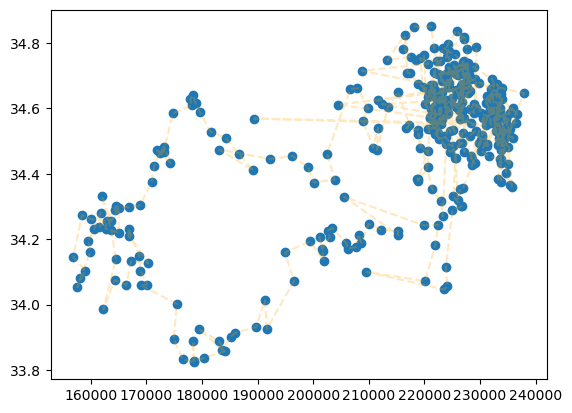

In [10]:
plt.scatter(MeanIceDaily, MeanSat)
plt.plot(MeanIceDaily, MeanSat, '--', color='orange', alpha=0.25)

#Circular means lag in the signal, one that increases and then second one increases

In [ ]:
del(MeanIceDaily)
del(STDIceDaily)
del(corr)

## Region 2

# ARGO data

In [43]:
_id = '3901591'
_id2 = '3901620'
argo_path = f's3://escience2022/Ada/ARGO/coriolis/{_id}/{_id}_prof.nc'
argo_path2 = f's3://escience2022/Ada/ARGO/coriolis/{_id2}/{_id2}_prof.nc'

In [45]:
Argo1 = xr.open_dataset(s3.open(argo_path))
Argo2 = xr.open_dataset(s3.open(argo_path2))

In [46]:
Argo1.JULD

<xarray.DataArray 'JULD' (N_PROF: 65)>
array(['2016-08-24T00:35:18.000002816', '2016-09-03T00:36:53.999995136',
       '2016-09-12T22:51:59.000001536', '2016-09-22T23:08:11.000000000',
       '2016-10-03T00:35:46.999996416', '2016-10-12T23:01:21.999995392',
       '2016-10-23T00:36:40.000000768', '2016-11-01T23:07:09.999998976',
       '2016-11-12T00:35:27.000004352', '2016-11-21T23:03:51.000002048',
       '2016-12-02T00:34:56.999996160', '2016-12-11T23:16:37.999995904',
       '2016-12-22T00:43:31.999998976', '2016-12-31T22:58:38.000000000',
       '2017-01-11T00:39:30.999998464', '2017-01-20T22:56:00.000002048',
       '2017-01-31T00:43:54.000000256', '2017-02-09T23:03:10.999997696',
       '2017-02-20T00:41:59.000000512', '2017-03-01T22:53:33.999999232',
       '2017-03-12T00:36:34.000003072', '2017-03-21T23:07:46.000004864',
       '2017-04-10T22:18:56.999999744', '2017-04-20T22:09:57.000001792',
       '2017-05-10T22:12:55.999996416', '2017-05-20T22:27:02.000004352',
       '2017-05-30T22:13:06.999996928', '2017-06-09T22:18:49.000002816',
       '2017-06-19T22:15:23.999998208', '2017-06-29T22:12:42.000001792',
       '2017-07-09T22:27:30.000003328', '2017-07-19T22:28:59.000003328',
       '2017-07-29T22:42:22.999997696', '2017-08-08T22:53:39.999996928',
       '2017-08-18T22:53:46.000004608', '2017-08-28T23:09:15.999999488',
       '2017-09-07T23:05:51.000004864', '2017-09-17T23:21:20.999999744',
       '2017-09-28T00:51:45.000000256', '2017-10-07T23:23:38.000001024',
       '2017-10-18T00:44:14.000002560', '2017-10-27T23:09:06.999997952',
       '2017-11-07T00:41:36.999998976', '2017-11-16T23:16:18.999998464',
       '2017-11-27T00:39:41.999999232', '2017-12-06T23:39:36.000004864',
       '2017-12-17T00:41:59.000000512', '2017-12-26T23:25:05.000001792',
       '2018-01-06T00:49:53.000004352', '2018-01-15T23:11:57.999995904',
       '2018-01-26T00:44:27.999996928', '2018-02-04T23:06:32.999998464',
       '2018-02-15T00:43:57.000004096', '2018-02-24T23:03:14.999996160',
       '2018-03-07T00:45:32.000001792', '2018-03-16T23:05:31.999997440',
       '2018-03-27T00:40:07.000004352', '2018-04-05T23:09:54.999999232',
       '2018-04-16T00:41:01.000003328', '2018-04-25T23:03:06.000004608',
       '2018-05-06T00:42:36.000001024', '2018-05-15T22:56:59.999998464',
       '2018-05-26T00:44:10.999998720', '2018-06-04T23:25:53.000003072',
       '2018-06-15T00:47:51.999996928'], dtype='datetime64[ns]')
Dimensions without coordinates: N_PROF
Attributes:
    long_name:      Julian day (UTC) of the station relative to REFERENCE_DAT...
    standard_name:  time
    conventions:    Relative julian days with decimal part (as parts of day)
    resolution:     1.1574074074074073e-05
    axis:           T

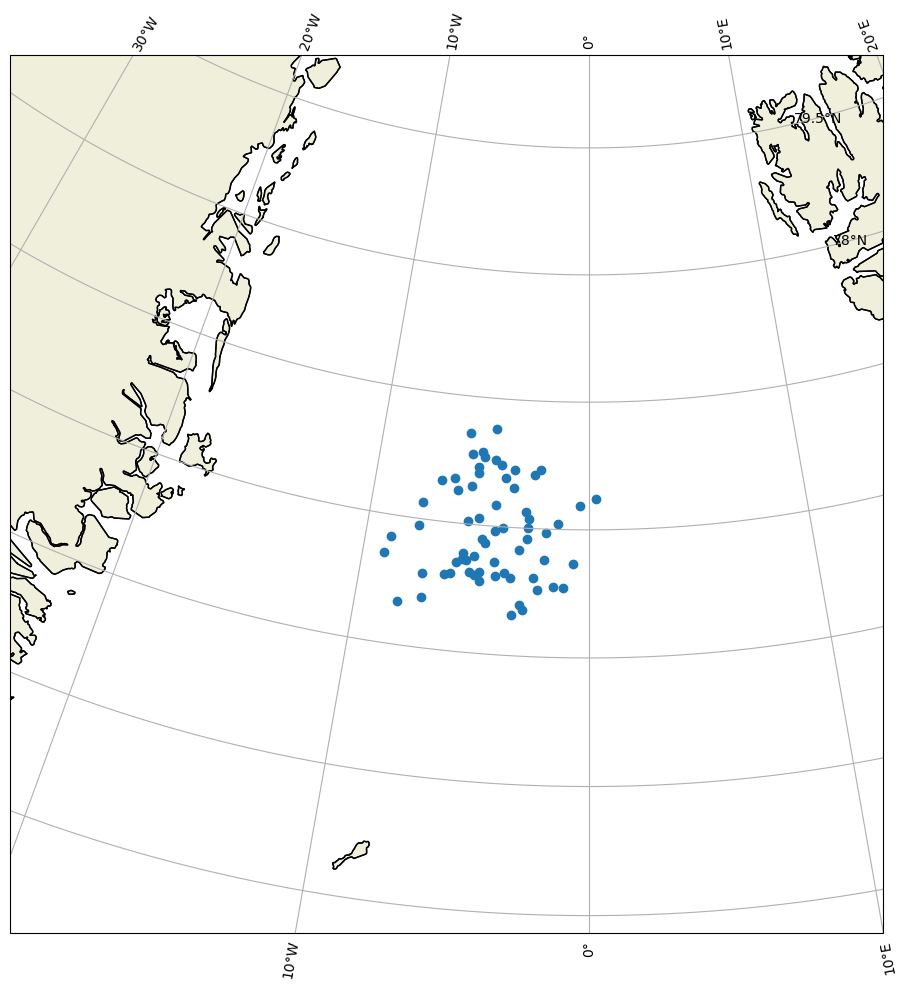

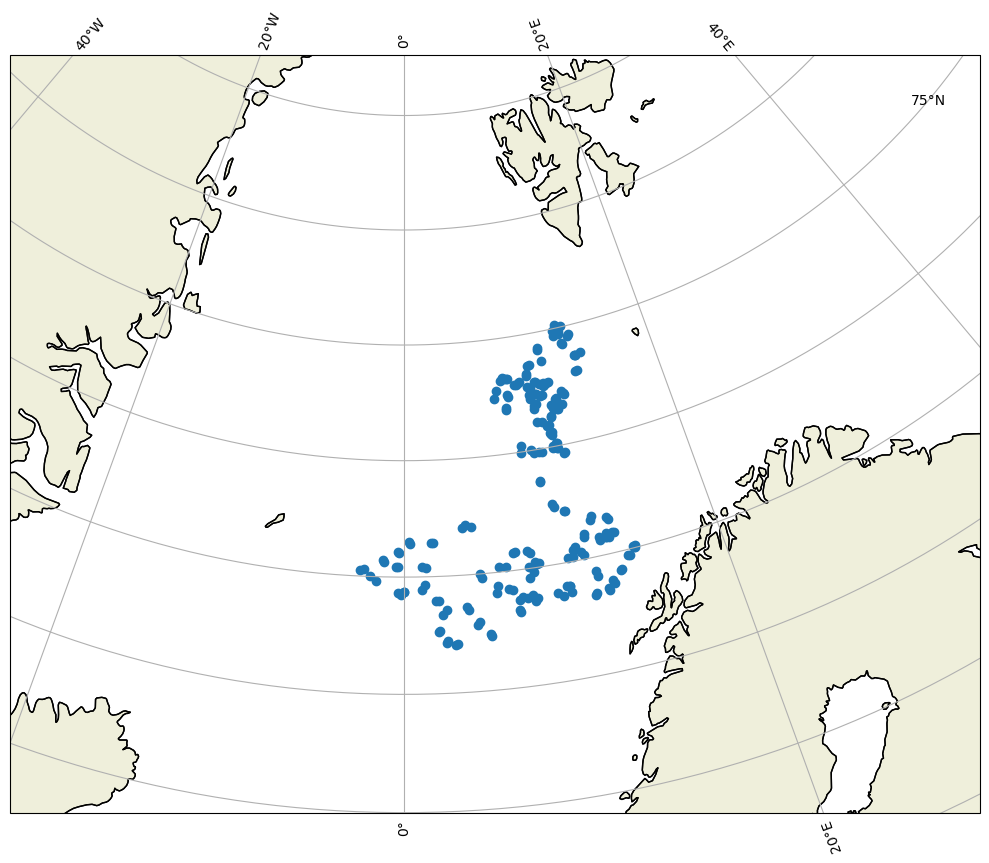

In [48]:
f.plot_argo_positions(Argo1, extent=[-20,10,80,70])
f.plot_argo_positions(Argo2, extent=[-20,30,80,65])

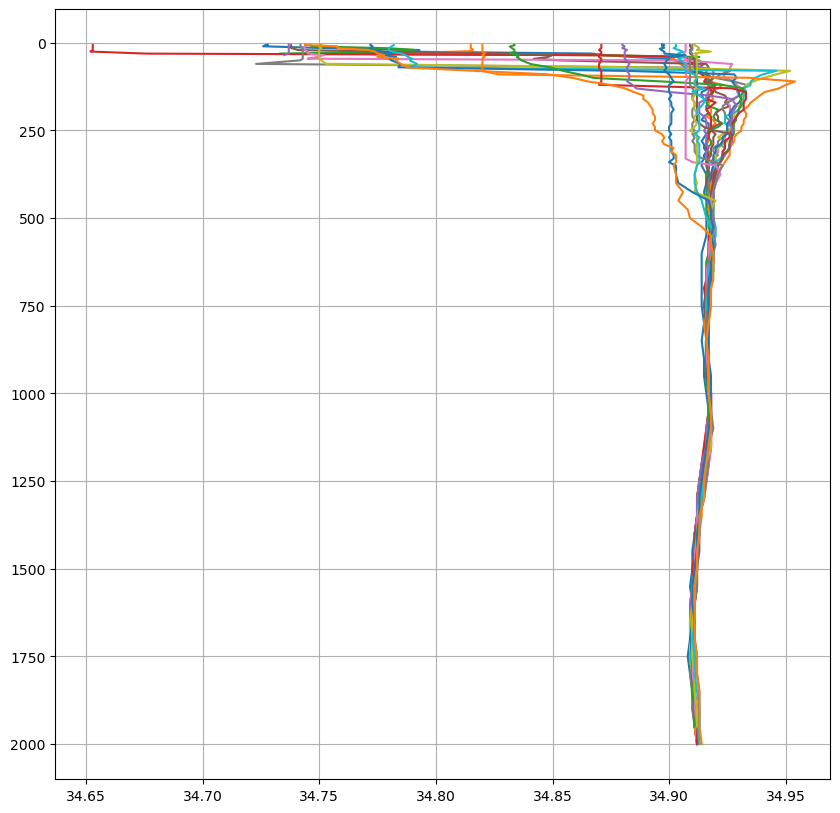

In [49]:
fig, ax = plt.subplots(figsize=(10,10))
for i in range(30):
    plt.plot(Argo1['PSAL_ADJUSTED'][i], Argo1['PRES'][i])
    #plt.plot(Argo2['PSAL_ADJUSTED'][i], Argo2['PRES'][i])
plt.gca().invert_yaxis()
ax.grid()

# Model data

## Region 1

In [9]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
cat = col.search(variable_id='so', source_id='UKESM1-0-LL', activity_id='CMIP', experiment_id='historical')
cat2 = col.search(variable_id='areacello', source_id='UKESM1-0-LL')

In [10]:
dset_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})
dset_dict2 = cat2.to_dataset_dict(zarr_kwargs={'use_cftime':True})
MDS_all = dset_dict[list(dset_dict.keys())[1]]
ModelDataList2 = list(dset_dict2.keys())
MDS = MDS_all.isel(lev=0).so.mean('member_id', keep_attrs=True)
areacello = dset_dict2[ModelDataList2[0]].squeeze()

del(dset_dict)
del(dset_dict2)
del(ModelDataList2)
MDS
#mds = MDS.sel(time='2010-10').sel(bnds=0).sel(lev=1, method='nearest').sel(vertices=0).squeeze()
#mds = f.slice_data(mds, min_lon = -10, max_lon=10, min_lat = 70, max_lat = 85)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


<xarray.DataArray 'so' (time: 1980, j: 330, i: 360)>
dask.array<mean_agg-aggregate, shape=(1980, 330, 360), dtype=float32, chunksize=(5, 330, 360), chunktype=numpy.ndarray>
Coordinates:
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 322 323 324 325 326 327 328 329
    latitude   (j, i) float32 dask.array<chunksize=(330, 360), meta=np.ndarray>
    lev        float64 0.5058
    longitude  (j, i) float32 dask.array<chunksize=(330, 360), meta=np.ndarray>
  * time       (time) object 1850-01-16 00:00:00 ... 2014-12-16 00:00:00
Attributes:
    cell_measures:   area: areacello volume: volcello
    cell_methods:    area: mean where sea time: mean
    comment:         mo: This variable is reported using a z* coordinate syst...
    long_name:       Sea Water Salinity
    original_name:   mo: (variable_name: so)
    original_units:  1e-3
    standard_name:   sea_water_salinity
    units:           0.001

In [26]:
MReg = MDS.sel(time = slice('1850','2010'))
MReg = f.slice_data(MReg, min_lat = 70, max_lat = 85, min_lon = -10, max_lon = 10)
#area = area.where(area['latitude']-(area['longitude']/2) > min(min_lat-min_lon/2-1, max_lat-max_lon/2-1), drop=True)

In [29]:
ac=areacello.where(
    (areacello['longitude'] > -10)
    & (areacello['longitude'] < 10)
    & (areacello['latitude'] > 70)
    & (areacello['latitude'] < 85),
    drop=True
    )

In [ ]:
MReg = WeightedMean(MReg, ac)

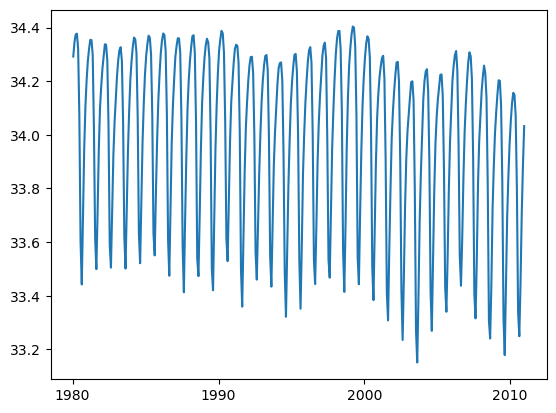

In [26]:
#mean.plot.scatter(x ='time')
plt.plot(MReg.time, MReg.so)
#plt.plot(RegionMean.time, RegionStd.so)

In [27]:
MonthlyMean = MReg.groupby('time.month').mean('time')
SatMean = np.load('SeaSurfaceSalinitySatellitSeasonality.npy')

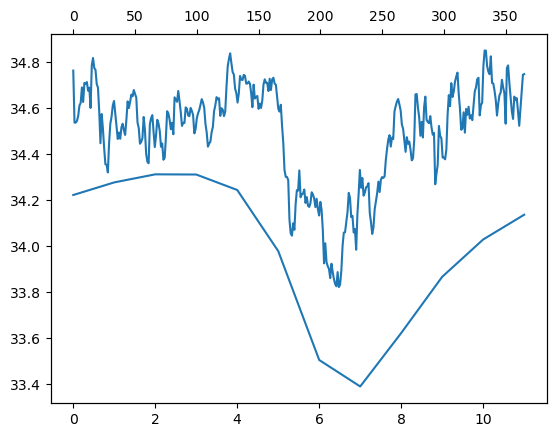

In [28]:
x = np.arange(12)
y = np.arange(len(SatMean))
fig, ax = plt.subplots()
ax.plot(x, MonthlyMean['so'])
ax2 = ax.twiny()
ax2.plot(y, SatMean)
plt.show()


In [30]:
with ProgressBar():
    MReg = f.WeightedMean(MReg, ac)

[########################################] | 100% Completed | 103.43 ms
[########################################] | 100% Completed | 102.68 ms
[########################################] | 100% Completed | 106.48 ms
[########################################] | 100% Completed | 102.77 ms
[########################################] | 100% Completed | 13m 8ss


In [ ]:
plt.plot(MReg.time, MReg)
x = np.arange(len(MReg.time))
res = stats.linregress(x, MReg)
plt.plot(MReg.time, res.intercept + res.slope*x, color='paleturquoise', lw=5)

In [38]:
MRegDepth = MDS.sel(time = slice('1980','2010')).sel(lev=200, method='nearest').sel(bnds=0).sel(vertices=0)
MRegDepth = f.slice_data(MRegDepth, min_lat = 70, max_lat = 85, min_lon = -10, max_lon = 10)

MRegDepth = WeightedMean(MRegDepth, ac)

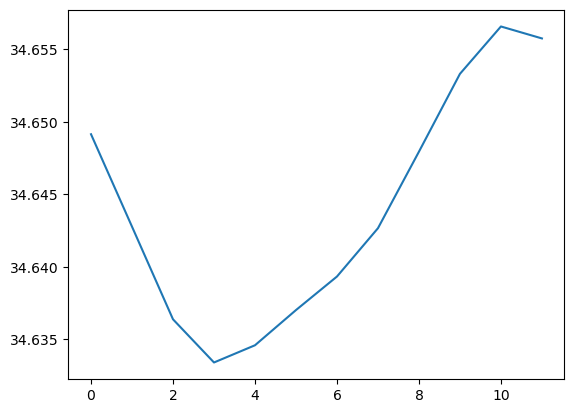

In [39]:
MRegDepth
MonthlyMeanDepth = MRegDepth.groupby('time.month').mean('time')
x = np.arange(12)
plt.plot(x, MonthlyMeanDepth.so)

# Region 2

In [13]:
MReg2 = MDS.sel(time = slice('1850','2010'))
#MReg2_clm = MDS.isel(lev=0).sel(time=slice('1850', '1880'))
MReg2 = f.slice_data(MReg2, min_lat = 70, max_lat = 80, min_lon = 100, max_lon = 160)
#MReg2_clm = f.slice_data(MReg2_clm, min_lat = 70, max_lat = 80, min_lon = 100, max_lon = 160)
MReg2

<xarray.DataArray 'so' (time: 1932, j: 30, i: 37)>
dask.array<where, shape=(1932, 30, 37), dtype=float32, chunksize=(5, 30, 37), chunktype=numpy.ndarray>
Coordinates:
  * i          (i) int32 56 57 58 59 60 61 62 63 64 ... 85 86 87 88 89 90 91 92
  * j          (j) int32 290 291 292 293 294 295 296 ... 314 315 316 317 318 319
    latitude   (j, i) float32 dask.array<chunksize=(30, 37), meta=np.ndarray>
    lev        float64 0.5058
    longitude  (j, i) float32 dask.array<chunksize=(30, 37), meta=np.ndarray>
  * time       (time) object 1850-01-16 00:00:00 ... 2010-12-16 00:00:00
Attributes:
    cell_measures:   area: areacello volume: volcello
    cell_methods:    area: mean where sea time: mean
    comment:         mo: This variable is reported using a z* coordinate syst...
    long_name:       Sea Water Salinity
    original_name:   mo: (variable_name: so)
    original_units:  1e-3
    standard_name:   sea_water_salinity
    units:           0.001

In [14]:
ac2=areacello.where(
    (areacello['longitude'] > 100)
    & (areacello['longitude'] < 160)
    & (areacello['latitude'] > 70)
    & (areacello['latitude'] < 80),
    drop=True
    )

In [17]:
with ProgressBar():
    MReg2 = f.WeightedMean(MReg2, ac2)

[########################################] | 100% Completed | 102.82 ms
[########################################] | 100% Completed | 105.45 ms
[########################################] | 100% Completed | 102.78 ms
[########################################] | 100% Completed | 101.94 ms
[########################################] | 100% Completed | 15m 22s


In [ ]:
MReg2_clm = f.WeightedMean(MReg2_clm, ac2)

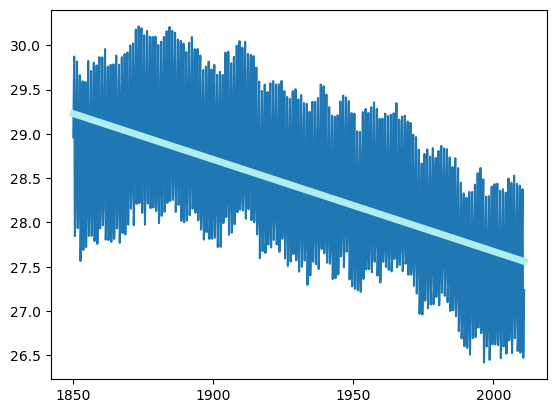

In [25]:
plt.plot(MReg2.time, MReg2)
x = np.arange(len(MReg2.time))
res = stats.linregress(x, MReg2)
plt.plot(MReg2.time, res.intercept + res.slope*x, color='paleturquoise', lw=5)

In [ ]:
MonthlyMean2 = MReg2.groupby('time.month').mean('time')

In [ ]:
x = np.arange(12)
#y = np.arange(len(SatMean))
fig, ax = plt.subplots()
ax.plot(x, MonthlyMean2['so'])

In [24]:

#'1980','2010'
years = np.arange(1980,2011,1)
months = np.arange(0,12,1)
dates = np.array([
    [datetime.datetime(y, 1,1) + relativedelta(months=m) for m in range(12)] for y in years])


"""
salinity_matrix = np.array([[
    MReg2['so'].sel(time=dates[i,j], method='nearest').mean(dim=['i', 'j'])
                            for i in range(np.shape(dates)[0])] 
                                           for j in range(np.shape(dates)[1])])
"""

"\nsalinity_matrix = np.array([[\n    MReg2['so'].sel(time=dates[i,j], method='nearest').mean(dim=['i', 'j'])\n                            for i in range(np.shape(dates)[0])] \n                                           for j in range(np.shape(dates)[1])])\n"

## Vertical Structure Model

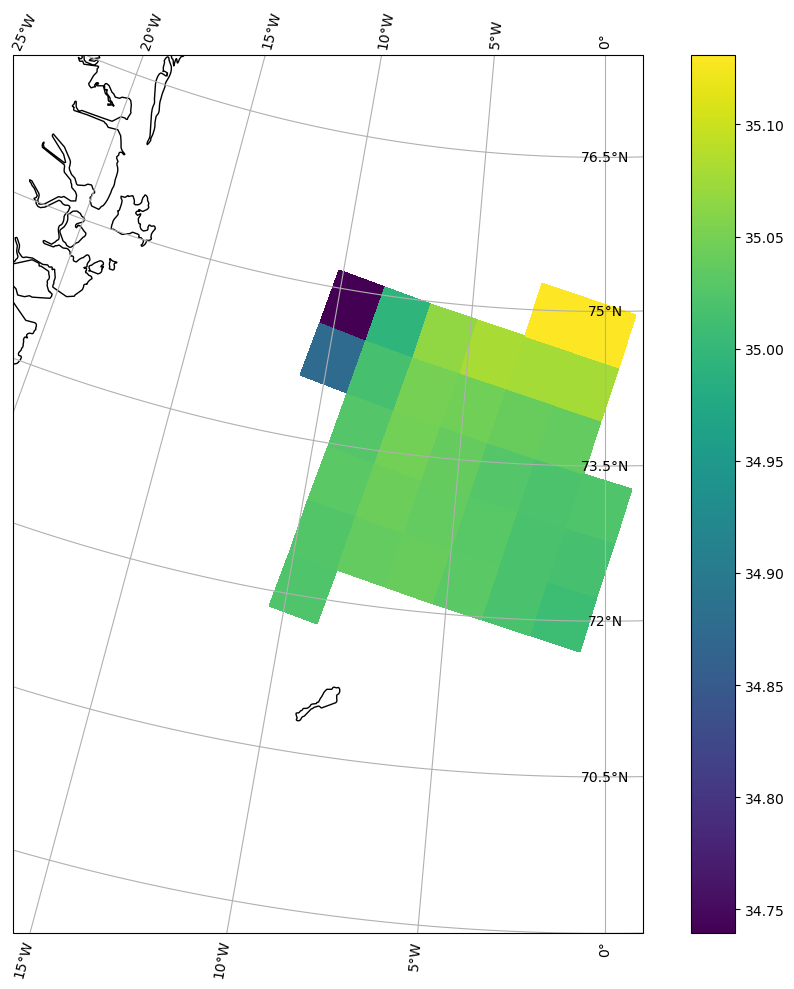

In [78]:
MDS
Vertical=MDS.sel(time=slice('2000', '2010')).sel(bnds=1).sel(vertices=0).squeeze()
#print(Vertical)
#Vertical = Vertical.sel(longitude=-3, method='nearest')
#Vertical = f.ConvertModelGrid(Vertical)
Vertical = Vertical.where(
    (Vertical['longitude'] < 0)
    & (Vertical['longitude'] > -10)
    & (Vertical['latitude'] < 75)
    & (Vertical['latitude'] > 72),
    drop=True)

f.PlotModel(Vertical.sel(lev=0, method='nearest').isel(time=0), extent=[-16,1,69,77])
#Mean vertical structure over an area

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


KeyboardInterrupt: 

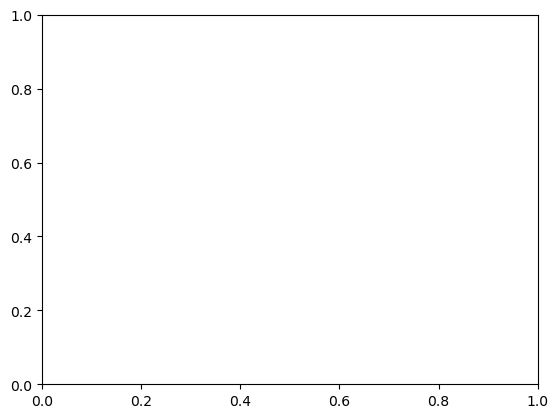

In [82]:
Vertical2 = Vertical.isel(lev=slice(0,60))
mean_structure=Vertical2['so'].mean('i').mean('j').mean('time')
std_structure=Vertical2['so'].std('i').std('j').mean('time')
fig, ax = plt.subplots()
ax.fill_between(Vertical2.lev, mean_structure-std_structure, mean_structure+std_structure)
plt.plot(mean_structure, Vertical2['lev'])
#plt.plot(mean_structure-std_structure, Vertical2['lev'], color='orange')
#plt.plot(mean_structure+std_structure, Vertical2['lev'], color='orange')
ax.invert_yaxis()
for i in range(len(Argo1['PSAL_ADJUSTED'])):
    plt.plot(Argo1['PSAL_ADJUSTED'][i], Argo1['PRES'][i])

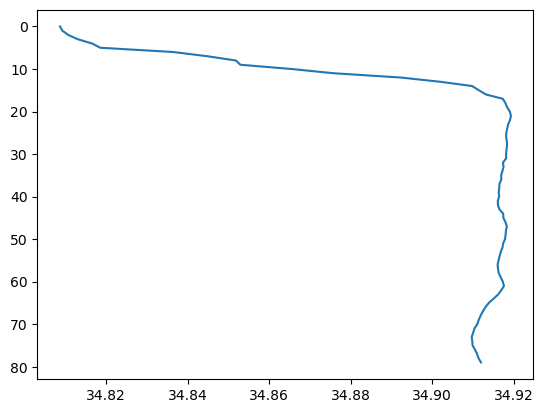

In [80]:
Argo1.JULD
profiles = Argo1.PSAL_ADJUSTED
depth = Argo1.PRES
profiles=profiles.mean('N_PROF')
fig, ax = plt.subplots()
plt.plot(profiles, np.arange(len(profiles)))
ax.invert_yaxis()

In [ ]:
Vertical2 = Vertical.isel(lev=slice(10,60))
mean_structure=Vertical2['so'].mean('i').mean('j').mean('time')
std_structure=Vertical2['so'].std('i').std('j').mean('time')
fig, ax = plt.subplots()
plt.plot(mean_structure, Vertical2['lev'])
plt.plot(mean_structure-std_structure, Vertical2['lev'], color='orange')
plt.plot(mean_structure+std_structure, Vertical2['lev'], color='orange')
ax.invert_yaxis()
for i in range(len(Argo1['PSAL_ADJUSTED'])):
    plt.plot(Argo1['PSAL_ADJUSTED'][i][10:], Argo1['PRES'][i][10:])